<a href="https://colab.research.google.com/github/monsieurshiva/Numpy-Basic/blob/main/IPL_Analysis_Shiva_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as nps
import pandas as pd
import decimal
from datetime import datetime
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
balls=pd.read_excel('/content/drive/MyDrive/Ball_by_Ball.xlsx')
matches=pd.read_excel('/content/drive/MyDrive/Match.xlsx')
players=pd.read_excel('/content/drive/MyDrive/Player.xlsx')
teams=pd.read_excel('/content/drive/MyDrive/Team.xlsx')

### --------------------------------Task 1--------------------------------#
###### Create a dataframe with three columns
###### Column 1: Team Names
###### Column 2: Total Matches played by each team
###### Column 3: Total Matches Won

In [4]:
totalmatch=matches.groupby('Team_Name_Id').count()
matchwon=matches.where(matches['Team_Name_Id']==matches['Match_Winner_Id']).dropna()
matchwon=matchwon.groupby('Team_Name_Id').count()
teamdata=pd.merge(teams,totalmatch,left_on='Team_Id', right_on='Team_Name_Id',how='inner')
teamdata=teamdata[['Team_Id','Team_Name','Match_Id']]
teamdata=pd.merge(teamdata,matchwon,left_on='Team_Id', right_on='Team_Name_Id',how='inner')
teamdata=teamdata[['Team_Name','Match_Id_x','Match_Id_y']]
teamdata.rename(columns={"Match_Id_x": "Total Matches played by each team", "Match_Id_y": "Total Matches Won"})


,Team_Name,Total Matches played by each team,Total Matches Won
0,Kolkata Knight Riders,62,37
1,Royal Challengers Bangalore,78,40
2,Chennai Super Kings,74,50
3,Kings XI Punjab,65,31
4,Rajasthan Royals,52,35
5,Delhi Daredevils,69,30
6,Mumbai Indians,62,39
7,Deccan Chargers,39,13
8,Kochi Tuskers Kerala,7,3
9,Pune Warriors,23,6


### --------------------------- TASK 2 --------------------------------#
##### Display the top 10 Runs scorer in the IPL
#### Display the top 10 batting performance in term of runs scored in the match

In [5]:
# Top 10 Runs scorer in the IPL
batsmanscore=balls.groupby('Striker_Id').sum()
batsmanscore=batsmanscore.sort_values(['Batsman_Scored'],ascending=False)
toprunscorers=pd.merge(batsmanscore,players,left_on='Striker_Id', right_on='Player_Id',how='inner')
toprunscorers[['Player_Name','Batsman_Scored']].head(10)

,Player_Name,Batsman_Scored
0,SK Raina,4106
1,V Kohli,4105
2,RG Sharma,3874
3,G Gambhir,3634
4,CH Gayle,3447
5,RV Uthappa,3390
6,DA Warner,3373
7,AB de Villiers,3270
8,MS Dhoni,3270
9,S Dhawan,3082


In [6]:
#Top 10 batting performance in term of runs scored in the match
batsmanscorepermatch=balls.groupby(['Striker_Id','Match_Id']).sum()
batsmanscorepermatch=batsmanscorepermatch.sort_values(['Batsman_Scored'],ascending=False)
toprunscorerspermatch=pd.merge(batsmanscorepermatch,players,left_on='Striker_Id', right_on='Player_Id',how='left')
toprunscorerspermatch[['Player_Name','Batsman_Scored']].head(10)

,Player_Name,Batsman_Scored
0,CH Gayle,175
1,BB McCullum,158
2,AB de Villiers,133
3,AB de Villiers,129
4,CH Gayle,128
5,M Vijay,127
6,V Sehwag,122
7,PC Valthaty,120
8,V Sehwag,119
9,CH Gayle,117


### ----------------------------TASK 3 ----------------------------------#
##### Display the Top 10 players interms of high strike rate 
###### (Note that a player must atleast scored 1000 runs to be in this list)

In [7]:
# Solution
#Strike Rate = (Runs Scored / Balls faced) * 100
batsmanscore=balls.groupby('Striker_Id').sum()
batsmangrtthousand=batsmanscore.where(batsmanscore['Batsman_Scored']>999).dropna()
ballsfaced=balls.groupby('Striker_Id').count()
strikerate=pd.merge(batsmangrtthousand,ballsfaced,on='Striker_Id', how='inner')
strikerate=strikerate[['Batsman_Scored_x','Batsman_Scored_y']]
strikerate['strike_rate']=(strikerate['Batsman_Scored_x']/strikerate['Batsman_Scored_y'])*100
strikerate=strikerate.sort_values(['strike_rate'],ascending=False).head(10)
strikerate=pd.merge(strikerate,players,left_on='Striker_Id', right_on='Player_Id',how='left')
strikerate=strikerate[['Player_Name','strike_rate']]
strikerate

,Player_Name,strike_rate
0,V Sehwag,148.827059
1,AB de Villiers,146.571044
2,CH Gayle,146.059322
3,YK Pathan,142.293907
4,KA Pollard,141.956522
5,DA Miller,140.550807
6,DA Warner,138.237705
7,SR Watson,136.597111
8,MS Dhoni,135.179826
9,SK Raina,134.226872


### ----------------------------TASK 4 ----------------------------------#
##### Display the Top 10 players interms of wickets taken  

In [8]:
# Solution
bowlerstat=balls.where(balls['Player_dissimal_Id']!=' ').dropna()
bowlerstat=bowlerstat.groupby('Bowler_Id').count()
bowlerstat=bowlerstat.sort_values(['Player_dissimal_Id'],ascending=False).head(10)
bowlerstat=pd.merge(bowlerstat,players,left_on='Bowler_Id', right_on='Player_Id',how='left')
bowlerstat=bowlerstat[['Player_Name','Player_dissimal_Id']]
bowlerstat.rename(columns={"Player_dissimal_Id": "Total Wickets"})

,Player_Name,Total Wickets
0,SL Malinga,134
1,Harbhajan Singh,116
2,A Mishra,107
3,DJ Bravo,107
4,PP Chawla,106
5,A Nehra,92
6,R Vinay Kumar,90
7,SR Watson,87
8,Z Khan,86
9,R Ashwin,84


### ----------------------------TASK 5 ----------------------------------#
##### Display the Top 10 players interms of Economic Rate 

In [9]:
# Solution
#Economy Rate = Runs Conceded / Overs
bowlerovers=balls.groupby('Bowler_Id').count()
bowlerovers['overs']=bowlerovers['Match_Id']/6
bowlerruns=balls.groupby('Bowler_Id').sum()
strikerate=pd.merge(bowlerruns,bowlerovers,on='Bowler_Id',how='inner')
strikerate=strikerate[['overs','Batsman_Scored_x']]
strikerate['Economy Rate']= strikerate['Batsman_Scored_x']/strikerate['overs']
strikerate=strikerate.sort_values(['Economy Rate'],ascending=True).head(10)
strikerate=pd.merge(strikerate,players,left_on='Bowler_Id', right_on='Player_Id',how='left')
strikerate[['Player_Name','Economy Rate']]

,Player_Name,Economy Rate
0,AC Gilchrist,0.000000
1,N Rana,3.000000
2,SS Mundhe,4.285714
3,LA Carseldine,4.285714
4,Sachin Baby,4.800000
5,AM Rahane,5.000000
6,DJ Thornely,5.181818
7,SM Harwood,5.462687
8,Sohail Tanvir,5.569811
9,FH Edwards,5.760000


### ----------------------------TASK 6 ----------------------------------#
#### Is that the CSK is a better team when they bat second ?

In [10]:
# Solution
#Fetching only matches with results
csk = matches.where(matches['IS_Result']==1 )

#merging with Teams to fetch only values of csk
cskhome=pd.merge(csk,teams,left_on='Team_Name_Id', right_on='Team_Id',how='inner')
cskhome=cskhome.where(cskhome['Team_Short_Code']=='CSK').dropna()

#Home matches were toss is won and team chose to bat second
cskhometosswin=cskhome[(cskhome['Team_Name_Id']==cskhome['Toss_Winner_Id']) & (cskhome['Toss_Decision']=='field')]

#Home matches were toss is lost and team forced to bat second
cskhometossloss=cskhome[(cskhome['Team_Name_Id']!=cskhome['Toss_Winner_Id']) & (cskhome['Toss_Decision']=='bat')]

#Combining both home matches and check if it matches with the winner
cskhome=pd.concat([cskhometosswin,cskhometossloss])
cskhome=cskhome[cskhome['Team_Name_Id']==cskhome['Match_Winner_Id']]

#merging with Teams to fetch only values of csk
cskaway=pd.merge(csk,teams,left_on='Opponent_Team_Id', right_on='Team_Id',how='inner')
cskaway=cskaway.where(cskaway['Team_Short_Code']=='CSK').dropna()

#Away matches were toss is won and team chose to bat second
cskawaytosswin=cskaway[(cskaway['Opponent_Team_Id']==cskaway['Toss_Winner_Id']) & (cskaway['Toss_Decision']=='field')]

#Away matches were toss is lost and team forced to bat second
cskawaytossloss=cskaway[(cskaway['Opponent_Team_Id']!=cskaway['Toss_Winner_Id']) & (cskaway['Toss_Decision']=='bat')]

#Combining both away matches and check if it matches with the winner
cskaway=pd.concat([cskawaytosswin,cskawaytossloss])
cskaway=cskaway[cskaway['Opponent_Team_Id']==cskaway['Match_Winner_Id']]

#combine both home and away
cskfinal=pd.concat([cskhome,cskaway])
cskfinal=cskfinal[['Team_Name_Id','Opponent_Team_Id','Toss_Winner_Id','Toss_Decision','Match_Winner_Id']]


print('No of matches won batting second: ',len(cskfinal))

#Fetching only matches with results
csk = matches.where(matches['IS_Result']==1 )

#merging with Teams to fetch only values of csk
cskhome=pd.merge(csk,teams,left_on='Team_Name_Id', right_on='Team_Id',how='inner')
cskhome=cskhome.where(cskhome['Team_Short_Code']=='CSK').dropna()

#Home matches were toss is won and team chose to bat first
cskhometosswin=cskhome[(cskhome['Team_Name_Id']==cskhome['Toss_Winner_Id']) & (cskhome['Toss_Decision']=='bat')]

#Home matches were toss is lost and team forced to bat first
cskhometossloss=cskhome[(cskhome['Team_Name_Id']!=cskhome['Toss_Winner_Id']) & (cskhome['Toss_Decision']=='field')]

#Combining both home matches and check if it matches with the winner
cskhome=pd.concat([cskhometosswin,cskhometossloss])
cskhome=cskhome[cskhome['Team_Name_Id']==cskhome['Match_Winner_Id']]

#merging with Teams to fetch only values of csk
cskaway=pd.merge(csk,teams,left_on='Opponent_Team_Id', right_on='Team_Id',how='inner')
cskaway=cskaway.where(cskaway['Team_Short_Code']=='CSK').dropna()

#Away matches were toss is won and team chose to bat first
cskawaytosswin=cskaway[(cskaway['Opponent_Team_Id']==cskaway['Toss_Winner_Id']) & (cskaway['Toss_Decision']=='bat')]

#Away matches were toss is lost and team forced to bat first
cskawaytossloss=cskaway[(cskaway['Opponent_Team_Id']!=cskaway['Toss_Winner_Id']) & (cskaway['Toss_Decision']=='field')]

#Combining both away matches and check if it matches with the winner
cskaway=pd.concat([cskawaytosswin,cskawaytossloss])
cskaway=cskaway[cskaway['Opponent_Team_Id']==cskaway['Match_Winner_Id']]

#combine both home and away
cskfinal=pd.concat([cskhome,cskaway])
cskfinal=cskfinal[['Team_Name_Id','Opponent_Team_Id','Toss_Winner_Id','Toss_Decision','Match_Winner_Id']]


print('No of matches won batting first: ',len(cskfinal))

print('Csk are not a better team when they bat second. They have higher win percentage when the bat first')


No of matches won batting second:  34
No of matches won batting first:  45
Csk are not a better team when they bat second. They have higher win percentage when the bat first


### ----------------------------TASK 7 ----------------------------------#
##### Is that Kholi is sucessful when he playing at 3 rather than opening the innings ?

In [11]:
#Solution
kohli=players[players['Player_Name']=='V Kohli']
kohliball=pd.merge(balls,kohli,left_on='Striker_Id',right_on='Player_Id',how='inner')
kohliball=kohliball.where(kohliball['Striker_Batting_Position']==3)
kohliball=kohliball.groupby('Match_Id').sum()
print('Average Batting Score when Kohli bats at 3',kohliball['Batsman_Scored'].sum()/len(kohliball))


kohliball=pd.merge(balls,kohli,left_on='Striker_Id',right_on='Player_Id',how='inner')
kohliball=kohliball.where(kohliball['Striker_Batting_Position']==1)
kohliball=kohliball.groupby('Match_Id').sum()
print('Average Batting Score when Kohli bats at 1',kohliball['Batsman_Scored'].sum()/len(kohliball))

print('Kohli scores more in average when he opens the innings')

Average Batting Score when Kohli bats at 3 29.896551724137932
Average Batting Score when Kohli bats at 1 39.90909090909091
Kohli scores more in average when he opens the innings


### ----------------------------TASK 8 ----------------------------------#
##### What is the probability of CSK to win a match if Raina score 30+ and Ashwin took 2+ wickets ?
#### What is the probability of MI to win a match if Pollard score 30+ and Mallinga took 2+ wickets ?

In [106]:
# Solution
csk=teams.loc[teams['Team_Name'] == 'Chennai Super Kings']
csk=pd.merge(csk,matches,left_on='Team_Id',right_on='Match_Winner_Id',how='inner').dropna()
print('No of matches won by csk: ',csk['Match_Winner_Id'].count())

raina=players.loc[players['Player_Name'] == 'SK Raina']
raina=pd.merge(raina,balls,left_on='Player_Id',right_on='Striker_Id',how='inner')
raina=raina.groupby('Match_Id').sum()
raina=raina.reset_index()
raina=raina[['Match_Id','Batsman_Scored']]
raina=raina.loc[raina['Batsman_Scored']>30]

ashwin=players.loc[players['Player_Name'] == 'R Ashwin']
ashwin=pd.merge(ashwin,balls,left_on='Player_Id',right_on='Bowler_Id',how='inner')
ashwin=ashwin.loc[ashwin['Player_dissimal_Id']!=' ']
ashwin=ashwin.groupby('Match_Id').count()
ashwin=ashwin.loc[ashwin['Player_Id']>2]
ashwin=ashwin.reset_index()
ashwin=ashwin[['Match_Id','Player_Id']]
ashwin=ashwin.rename(columns={'Player_Id': 'No of Wickets'})
ashwin

cskfinal=pd.merge(ashwin,raina,on='Match_Id',how='inner')
print('No of matches where Raina score 30+ and Ashwin took 2+ wickets: ',cskfinal['Match_Id'].count())

cskfinalfinal=pd.merge(cskfinal,csk,on='Match_Id',how='inner')
print('No of matches where Raina score 30+ and Ashwin took 2+ wickets and won the match: ',cskfinal['Match_Id'].count())
print('100 % probability that csk wins if Raina score 30+ and Ashwin took 2+ wickets')

No of matches won by csk:  79
No of matches where Raina score 30+ and Ashwin took 2+ wickets:  2
No of matches where Raina score 30+ and Ashwin took 2+ wickets and won the match:  2
100 % probability that csk wins if Raina score 30+ and Ashwin took 2+ wickets


In [112]:
mi=teams.loc[teams['Team_Name'] == 'Mumbai Indians']
mi=pd.merge(mi,matches,left_on='Team_Id',right_on='Match_Winner_Id',how='inner').dropna()
print('No of matches won by mi: ',mi['Match_Winner_Id'].count())

raina=players.loc[players['Player_Name'] == 'KA Pollard']
raina=pd.merge(raina,balls,left_on='Player_Id',right_on='Striker_Id',how='inner')
raina=raina.groupby('Match_Id').sum()
raina=raina.reset_index()
raina=raina[['Match_Id','Batsman_Scored']]
raina=raina.loc[raina['Batsman_Scored']>30]

ashwin=players.loc[players['Player_Name'] == 'SL Malinga']
ashwin=pd.merge(ashwin,balls,left_on='Player_Id',right_on='Bowler_Id',how='inner')
ashwin=ashwin.loc[ashwin['Player_dissimal_Id']!=' ']
ashwin=ashwin.groupby('Match_Id').count()
ashwin=ashwin.loc[ashwin['Player_Id']>2]
ashwin=ashwin.reset_index()
ashwin=ashwin[['Match_Id','Player_Id']]
ashwin=ashwin.rename(columns={'Player_Id': 'No of Wickets'})
ashwin

cskfinal=pd.merge(ashwin,raina,on='Match_Id',how='inner')
print('No of matches where Pollard score 30+ and Mallinga took 2+ wickets: ',cskfinal['Match_Id'].count())

cskfinalfinal=pd.merge(cskfinal,mi,on='Match_Id',how='inner')
print('No of matches where Pollard score 30+ and Mallinga took 2+ wickets and won the match: ',cskfinal['Match_Id'].count())
print('100 % probability that mi wins if Pollard score 30+ and Mallinga took 2+ wickets')



No of matches won by mi:  80
No of matches where Pollard score 30+ and Mallinga took 2+ wickets:  2
No of matches where Pollard score 30+ and Mallinga took 2+ wickets and won the match:  2
100 % probability that mi wins if Pollard score 30+ and Mallinga took 2+ wickets


### ----------------------------TASK 9 ----------------------------------#
##### Which team's runs per matches is close to Normal distribution ?

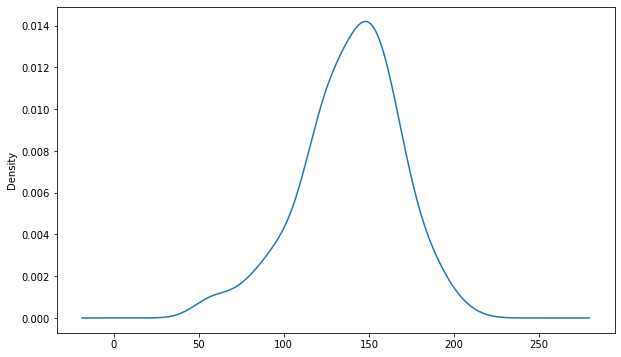

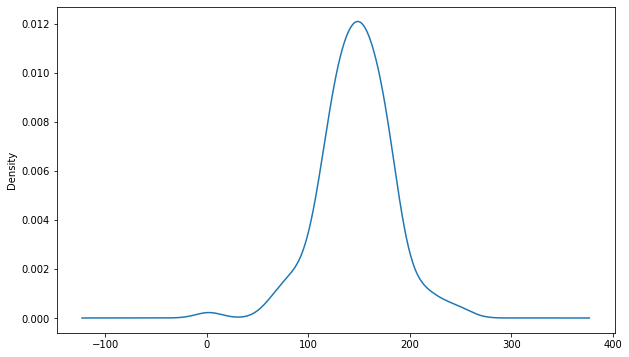

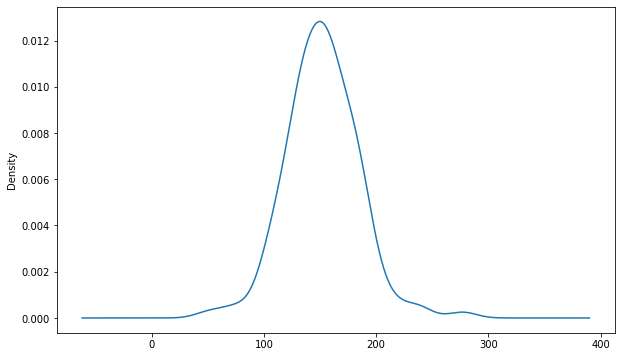

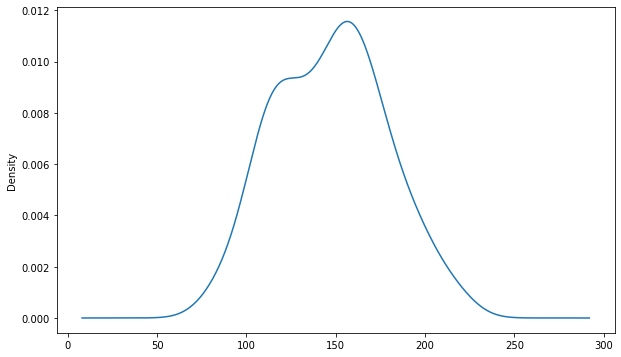

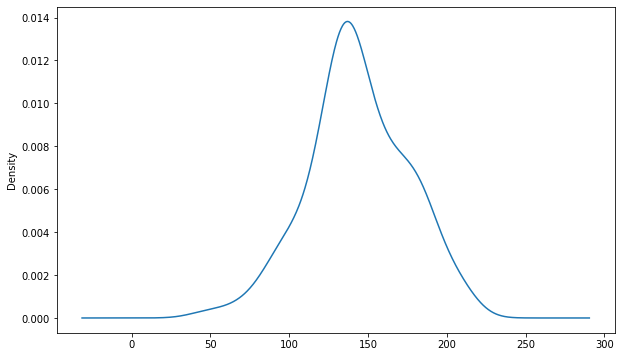

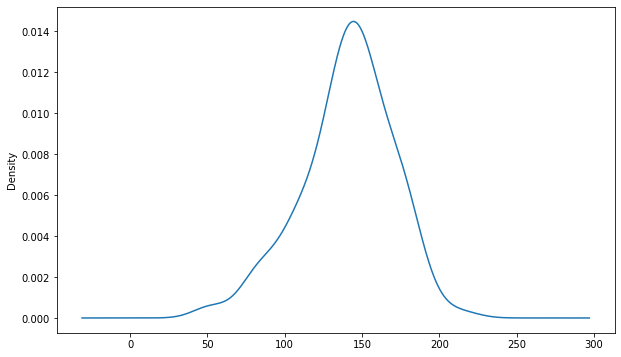

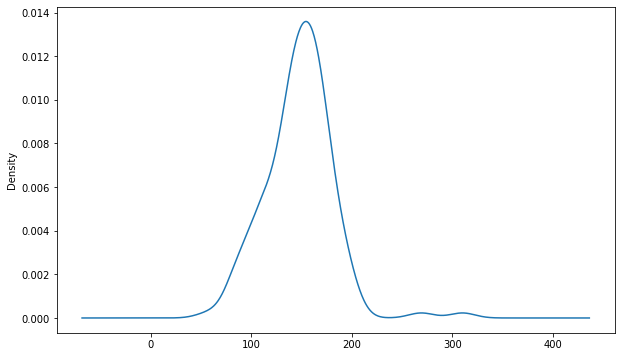

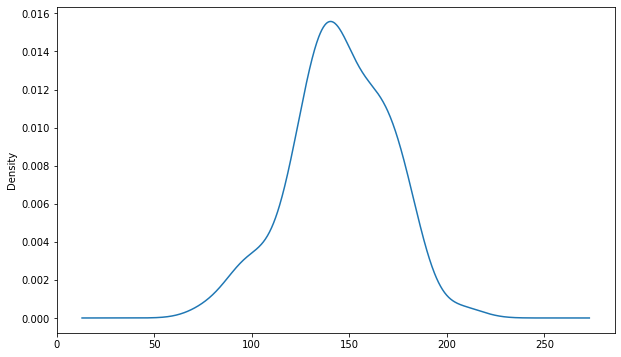

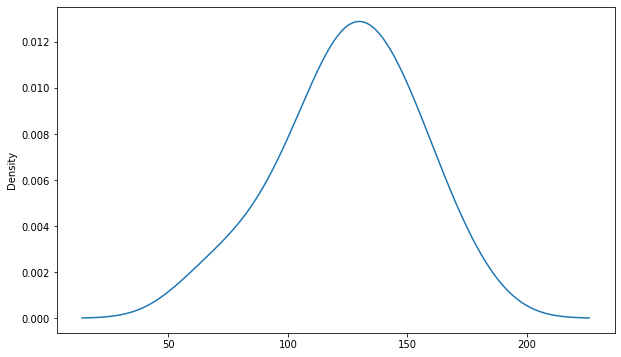

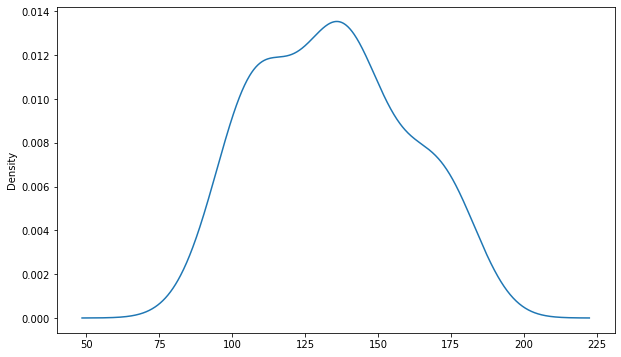

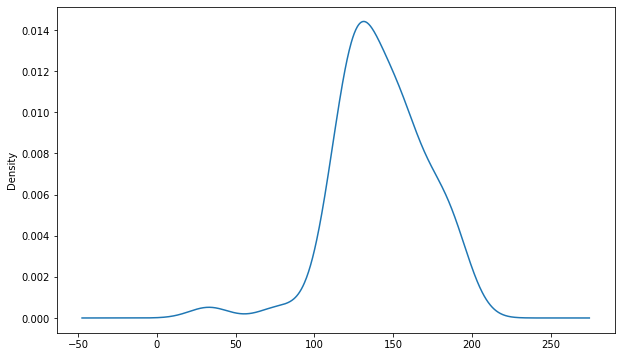

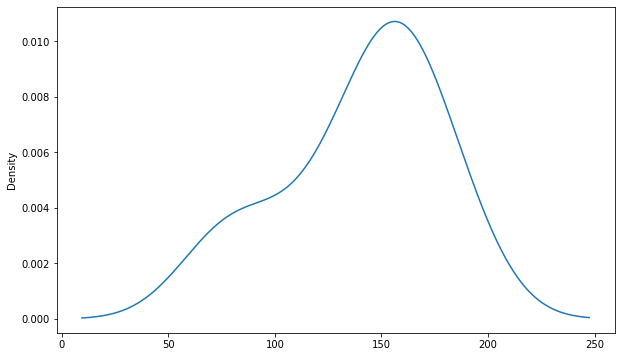

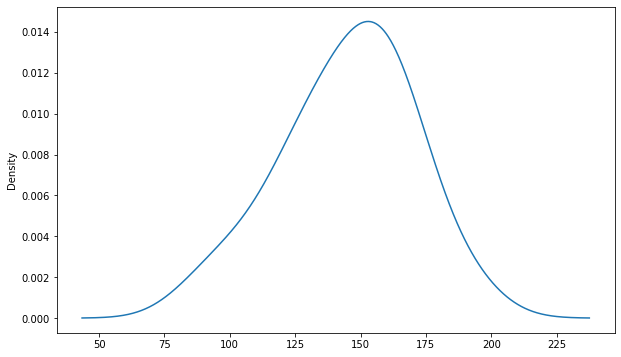

In [13]:
# Solution
for i in range(1,14):
    plt.figure(figsize=(10,6))
    ballsnorm=balls[balls['Team_Batting_Id']==i]
    ballsnorm=pd.merge(ballsnorm,teams,left_on='Team_Batting_Id',right_on='Team_Id',how='inner')
    ballsnorm=ballsnorm.groupby(['Team_Name','Match_Id'])['Batsman_Scored'].sum().plot(kind='kde')    








### ----------------------------TASK 10 ----------------------------------#
##### Find the luckiest day for each team interms of win percentage

In [14]:
# Solution
day=matches
day=pd.merge(matches,teams,left_on='Match_Winner_Id',right_on='Team_Id',how='inner').dropna()
day['day']=day['Match_Date'].dt.day_name()
day=day.where(day['IS_Result']==1)
day=day.groupby(['Team_Name','day']).count()
day.groupby(level=0).idxmax()['Team_Name_Id']

Team_Name
Chennai Super Kings                    (Chennai Super Kings, Saturday)
Deccan Chargers                              (Deccan Chargers, Sunday)
Delhi Daredevils                          (Delhi Daredevils, Thursday)
Gujarat Lions                                (Gujarat Lions, Saturday)
Kings XI Punjab                              (Kings XI Punjab, Sunday)
Kochi Tuskers Kerala                    (Kochi Tuskers Kerala, Monday)
Kolkata Knight Riders                  (Kolkata Knight Riders, Sunday)
Mumbai Indians                                (Mumbai Indians, Sunday)
Pune Warriors                                  (Pune Warriors, Sunday)
Rajasthan Royals                            (Rajasthan Royals, Sunday)
Rising Pune Supergiants            (Rising Pune Supergiants, Saturday)
Royal Challengers Bangalore    (Royal Challengers Bangalore, Saturday)
Sunrisers Hyderabad                      (Sunrisers Hyderabad, Friday)
Name: Team_Name_Id, dtype: object

### ----------------------------TASK 11 ----------------------------------# 
##### Is that runs scored in the power play having the impact on match result ?

In [36]:
ballspower=balls[['Match_Id','Over_Id','Team_Batting_Id','Batsman_Scored']]
ballspower=ballspower[(ballspower['Over_Id'] == 1) | (ballspower['Over_Id'] == 2) | (ballspower['Over_Id'] == 3) | (ballspower['Over_Id'] == 4) | (ballspower['Over_Id'] == 5) | (ballspower['Over_Id'] == 6)]
ballspower=ballspower[['Match_Id','Team_Batting_Id','Batsman_Scored']]
ballswinner=ballspower.groupby(['Match_Id','Team_Batting_Id']).sum()
ballswinner=ballswinner.reset_index()
ballswinner=pd.merge(ballswinner,matches,left_on=['Match_Id','Team_Batting_Id'],right_on=['Match_Id','Match_Winner_Id'],how='inner').dropna()
print ('On an average team''s winning the match score ',ballswinner['Batsman_Scored'].mean(),' runs in the power play')
ballswinner[['Match_Id','Team_Batting_Id','Batsman_Scored']].head(5)


On an average teams winning the match score  44.603873239436616  runs in the power play


,Match_Id,Team_Batting_Id,Batsman_Scored
0,335987,1,51
1,335988,3,50
2,335989,6,53
3,335990,2,39
4,335991,1,21


In [37]:
ballspower=balls[['Match_Id','Over_Id','Team_Batting_Id','Batsman_Scored']]
ballspower=ballspower[(ballspower['Over_Id'] == 1) | (ballspower['Over_Id'] == 2) | (ballspower['Over_Id'] == 3) | (ballspower['Over_Id'] == 4) | (ballspower['Over_Id'] == 5) | (ballspower['Over_Id'] == 6)]
ballstotal=ballspower.groupby(['Match_Id','Team_Batting_Id']).sum()
ballstotal=ballstotal.reset_index()
ballstotal=pd.merge(ballstotal,matches,left_on=['Match_Id'],right_on=['Match_Id'],how='inner').dropna()
ballstotal=ballstotal[['Match_Id','Team_Batting_Id','Batsman_Scored']]
ballswinner=ballswinner[['Match_Id','Team_Batting_Id','Batsman_Scored']]
df = ballstotal.drop_duplicates().merge(ballswinner.drop_duplicates(), on=ballswinner.columns.to_list(), 
                   how='left', indicator=True)
ballsloser=df.loc[df._merge=='left_only',df.columns!='_merge']
print ('On an average team''s losing the match score ',ballsloser['Batsman_Scored'].mean(),' runs in the power play')
ballsloser[['Match_Id','Team_Batting_Id','Batsman_Scored']].head(5)

On an average teams losing the match score  38.83362831858407  runs in the power play


,Match_Id,Team_Batting_Id,Batsman_Scored
1,335987,2,19
3,335988,4,61
4,335989,5,34
7,335990,7,41
9,335991,8,35


### Business Inference
 As we can see, winning team average 44 runs while the losing team average around 38 runs in the power play. Hence we can say runs scored in powerplay impact the result of the match.

### ----------------------------TASK 12 ----------------------------------# 
##### Is that economic rate of the bowler have an impact on their wicket taking ability ? 

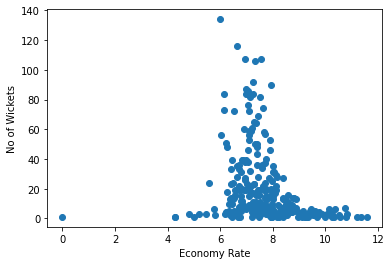

In [16]:
# Solution
bowlerovers=balls.groupby('Bowler_Id').count()
bowlerovers['overs']=bowlerovers['Match_Id']/6
bowlerruns=balls.groupby('Bowler_Id').sum()
strikerate=pd.merge(bowlerruns,bowlerovers,on='Bowler_Id',how='inner')
strikerate=strikerate[['overs','Batsman_Scored_x']]
strikerate['Economy Rate']= strikerate['Batsman_Scored_x']/strikerate['overs']
strikerate=strikerate[['Economy Rate']]

wickets=balls.where(balls['Dissimal_Type']!=' ')
wickets=wickets.groupby('Bowler_Id').count()
wickets=wickets['Match_Id']

final=pd.merge(strikerate,wickets,on='Bowler_Id',how='inner').dropna()
final.rename(columns={'Match_Id': 'No of Wickets'})

finalproper=pd.merge(players,final,left_on='Player_Id',right_on='Bowler_Id',how='inner')
finalproper.head(5)

finalproper=finalproper.drop(['Player_Id','DOB','Batting_Hand','Bowling_Skill','Country','Is_Umpire','Unnamed: 7'],axis=1)
finalproper=finalproper.rename(columns={'Match_Id': 'No of Wickets'})

plt.scatter(finalproper['Economy Rate'],finalproper['No of Wickets'])  
plt.xlabel("Economy Rate")
plt.ylabel("No of Wickets")

plt.show()

No correlation between two factors.Lower the economy rate does not necesarily imply higher wickets. The best wicket takers on an average have economy rate between 6 and 8